In [2]:
%reload_ext autoreload

import musx

import sys
sys.path.insert(0, '..') 
import musx_images

In [3]:
def image_triads(queue, chan, image, notes, length, rhy):
    global points
    points = []

    random_gen = musx_images.random_2d(image)
    rhythms = musx.choose([0, rhy/4, rhy/2, [0, rhy/2], [0, rhy/4, rhy/2, 3 * (rhy/4)], [0, 3 * (rhy/4)]])

    for _ in range(length):
        triad_raw, location = next(random_gen)
        points.append(location)
        
        triad = map(lambda x : notes[round(musx.rescale(x, 0, 255, 0, len(notes) - 1))], triad_raw)
        for note_num in triad:
            r = next(rhythms)
            if musx.isnum(r):
                queue.out.addevent(musx.MidiNote(time=queue.now, dur=rhy - r, key=note_num, chan=chan))
            else:
                deltas = musx.deltas(r + [rhy])
                for ind, time in enumerate(r):
                    queue.out.addevent(musx.MidiNote(time=queue.now + time, dur=deltas[ind], key=note_num, chan=chan))
        yield rhy


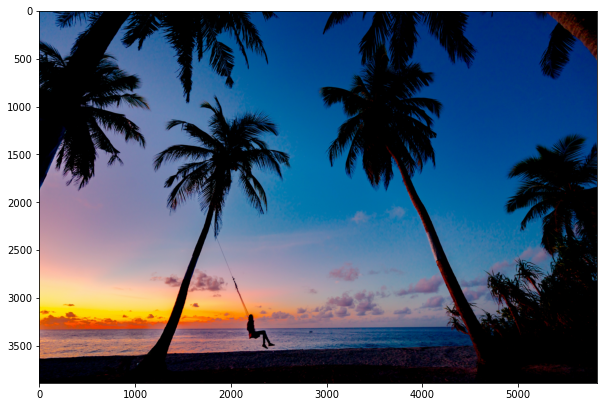

In [4]:
image = musx_images.load_image("../images/sunset_swing.jpg")
musx_images.display_image(image)

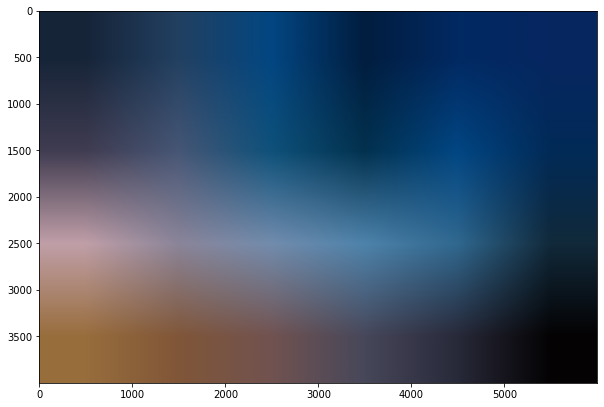

In [5]:
blurred_image = musx_images.blur_image(image, 1000)
musx_images.display_image(blurred_image)

In [6]:
points = []

t0 = musx.MidiSeq.metaseq(ins={})
t1 = musx.MidiSeq()

queue = musx.Scheduler(out=t1)

queue.compose([
    [0, image_triads(queue, 0, blurred_image, musx.scale(48, 31, 2, 2, 1, 2, 2, 2, 1), 100, 1)]
])

musx.MidiFile("image_triads.mid", [t0, t1]).write()

Done!


<MidiFile: 'image_triads.mid' 0x7f906e8440d0>

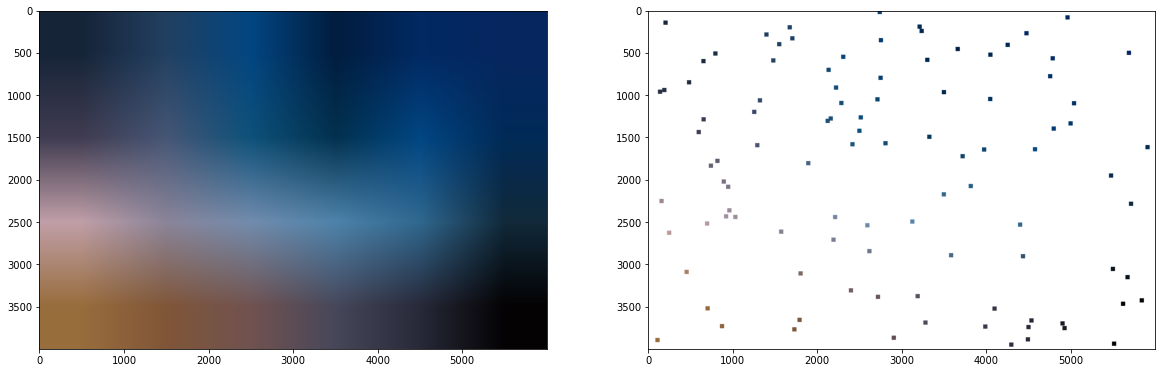

In [7]:
points_image = musx_images.points_image(blurred_image, points)
musx_images.display_images([blurred_image, points_image])